#### Activation 使用常用Relu，此例效果明顯比sigmoid好
#### loss function 因為是多分類問題，使用 categorical_crossentropy
#### optimizer  使用常用的 Adam
#### hidden layer 發現一味增多神經元個數似乎沒有幫助
#### 因此選擇 第一層 30個 第二層20個
#### 即有接近95%的正確率

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist    #資料
from keras.utils import np_utils    #轉為分類問題
from keras.utils import to_categorical 
from keras.models import Sequential #神經網路相關套件  標準
from keras.layers import Dense, Activation
from keras.optimizers import SGD    #隨機調整
from keras.optimizers import Adam
from ipywidgets import interact_manual

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   #載入資料

In [3]:
X = x_train[99]  #檢查檔案
X.shape

(28, 28)

1


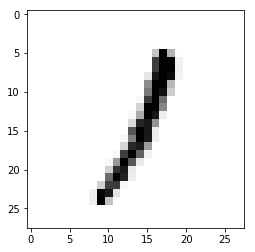

In [4]:
plt.imshow(X, cmap = 'Greys')  #檢查label 是否正確
print(y_train[99])

In [5]:
x_train = x_train.reshape(60000, 784)   #調整成神經網路的輸入格式
x_test = x_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train, 10)   #轉為分類問題
y_test = np_utils.to_categorical(y_test, 10)
y_train[99]   #檢查

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

建立模型

In [6]:
L1 = 30  #第一層
L2 = 20  #第二層
model = Sequential()
model.add(Dense(L1, input_dim=784)) 
model.add(Activation('relu'))        #選擇常用的relu    #測試後relu結果較好
model.add(Dense(L2))                 
model.add(Activation('relu'))
model.add(Dense(10))             #output 分類的 10維
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',   #多分類問題使用categorical_crossentropy
              optimizer=Adam(lr=0.001), metrics=["accuracy"])  #選擇常用optimizer Adam
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0


In [7]:
#檢查
print("第一層:",784*L1+L1)
print("第二層:",L1*L2+L2)
print("第二層:",L2*10+10)

第一層: 23550
第二層: 620
第二層: 210


開始訓練

In [8]:
model_1 = model.fit(x_train, y_train, 
                    batch_size=100, epochs=15, verbose=1,
                    validation_data =(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 79us/step - loss: 6.9664 - acc: 0.5528 - val_loss: 4.3305 - val_acc: 0.7196
Epoch 2/15
60000/60000 [==============================] - 3s 57us/step - loss: 3.5805 - acc: 0.7621 - val_loss: 1.5632 - val_acc: 0.8860
Epoch 3/15
60000/60000 [==============================] - 4s 59us/step - loss: 1.2905 - acc: 0.9036 - val_loss: 1.1147 - val_acc: 0.9172
Epoch 4/15
60000/60000 [==============================] - 3s 57us/step - loss: 1.0175 - acc: 0.9234 - val_loss: 1.0041 - val_acc: 0.9259
Epoch 5/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.9046 - acc: 0.9316 - val_loss: 0.8637 - val_acc: 0.9347
Epoch 6/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.7990 - acc: 0.9392 - val_loss: 0.7903 - val_acc: 0.9404
Epoch 7/15
60000/60000 [==============================] - 3s 57us/step - loss: 0

10000/10000 [==============================] - 1s 56us/step
loss: 0.5556801431593744
正確率 0.9552


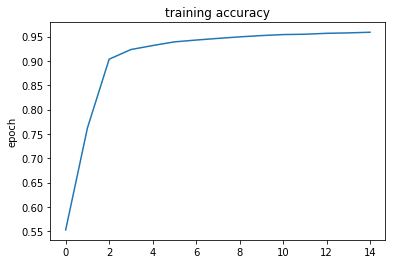

In [9]:
plt.plot(model_1.history["acc"])
plt.title("training accuracy")
plt.ylabel("accuracy")
plt.ylabel("epoch") #訓練次數
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

In [10]:
predict = model.predict_classes(x_test)
def sh(num):
    plt.imshow(x_test[num].reshape(28,28), cmap='Greys')
    print('神經網路判斷結果為:', predict[num])
interact_manual(sh, num=(0, 9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.sh(num)>

In [11]:
model_json = model.to_json()     #儲存參數
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')